<a href="https://colab.research.google.com/github/kasa10/Digital_Team_Gazpromneft_MIPT/blob/main/pad_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Explore**

В этой части мы выводим таблицу и информацию о структуре данных

In [2]:
import pandas as pd
pd.set_option('max_rows', 10) #Здесь можно настроить максимально возможную длинну столбца 


def explore_data():
    """ Make some visualizations and collect statistics about data in files """
    train = pd.read_csv('train.csv')
    #test = pd.read_csv('../data/test.csv')

    print(f'Размер train таблицы {train.shape}')
    #print(f'Размер test таблицы {test.shape}')

    print(f'Количество уникальных скважин в train таблице: {len(train["Номер скважины"].unique())}')
    #print(f'Количество уникальных скважин в test таблице: {len(test["Номер скважины"].unique())}')

    wells = list(train["Номер скважины"].unique())
    #print(wells) список
    well_df = train[train["Номер скважины"] == wells[0]]
    print(well_df)
    print(f'Размер таблицы с данными для одной скважины {well_df.shape}')


if __name__ == '__main__':
    explore_data()


Размер train таблицы (67136, 20)
Количество уникальных скважин в train таблице: 106
       datetime  Номер скважины  Дебит нефти  Давление забойное         x  \
0    1990-08-01               0    19.939000                NaN  18670.86   
1    1990-08-02               0    19.939000          39.064454  18670.86   
2    1990-08-03               0    21.172000          39.064487  18670.86   
3    1990-08-04               0    22.529000          38.965297  18670.86   
4    1990-08-05               0    22.529000          38.766822  18670.86   
..          ...             ...          ...                ...       ...   
615  1992-04-07               0     4.534759                NaN  18670.86   
616  1992-04-08               0     4.535000          51.641410  18670.86   
617  1992-04-09               0    14.877000          51.641410  18670.86   
618  1992-04-10               0    14.459000          51.641410  18670.86   
619  1992-04-11               0    15.434333          51.641413  1867

Здесь смотрим пропуски в данных

In [3]:
train = pd.read_csv('train.csv')
wells = list(train["Номер скважины"].unique())
well_df = train[train["Номер скважины"] == wells[0]]
print("Количество пропусков в данных (из 620): ")

for i in range(2, 20):
  print(f'{well_df.keys()[i]} {well_df[well_df.keys()[i]][0:-1].isnull().sum()}')

  

Количество пропусков в данных (из 620): 
Дебит нефти 0
Давление забойное 70
x 0
y 0
Объем жидкости 598
Объем нефти 598
Активная мощность (ТМ) 75
Время работы (ТМ) 75
Газовый фактор рабочий (ТМ) 330
Давление буферное 528
Давление забойное от Hд 3
Давление забойное от Pпр 166
Давление линейное (ТМ) 2
Давление на входе ЭЦН (ТМ) 47
Дебит газа (ТМ) 127
Дебит газа попутного 239
Дебит жидкости (ТМ) 132
Коэффициент мощности (ТМ) 69


Смотрим таблички

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
67131   NaN
67132   NaN
67133   NaN
67134   NaN
67135   NaN
Name: Газовый фактор рабочий (ТМ), Length: 67136, dtype: float64


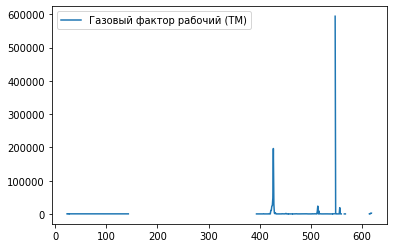

In [4]:
pd.set_option('max_rows', 1000)
%matplotlib inline

well_df = train[train["Номер скважины"] == wells[0]]
print(train['Газовый фактор рабочий (ТМ)'])

well_df.plot(y=['Газовый фактор рабочий (ТМ)'])

**Интерполяция данных и создание файла .csv**

In [16]:
#pd.set_option('max_rows', 1000)
from google.colab import files
%matplotlib inline

wells = list(train["Номер скважины"].unique())
well_df = train

#  train_int = well_df.fillna(method='ffill')
train_int = well_df.fillna(method='pad').interpolate(limit_direction ='backward')

print(train_int.isnull().sum())



datetime                       0
Номер скважины                 0
Дебит нефти                    0
Давление забойное              0
x                              0
y                              0
Объем жидкости                 0
Объем нефти                    0
Активная мощность (ТМ)         0
Время работы (ТМ)              0
Газовый фактор рабочий (ТМ)    0
Давление буферное              0
Давление забойное от Hд        0
Давление забойное от Pпр       0
Давление линейное (ТМ)         0
Давление на входе ЭЦН (ТМ)     0
Дебит газа (ТМ)                0
Дебит газа попутного           0
Дебит жидкости (ТМ)            0
Коэффициент мощности (ТМ)      0
dtype: int64


In [17]:
train_int.to_csv('pad_data.csv', index=False) 
train_int

,datetime,Номер скважины,Дебит нефти,Давление забойное,x,y,Объем жидкости,Объем нефти,Активная мощность (ТМ),Время работы (ТМ),Газовый фактор рабочий (ТМ),Давление буферное,Давление забойное от Hд,Давление забойное от Pпр,Давление линейное (ТМ),Давление на входе ЭЦН (ТМ),Дебит газа (ТМ),Дебит газа попутного,Дебит жидкости (ТМ),Коэффициент мощности (ТМ)
0,1990-08-01,0,19.939,39.064454,18670.86,5714.86,788.311,757.568,50.851351,9.600833,239.555,20.0,33.913336,39.064454,1.887872,30.293676,3843.746667,24.25,24.250000,98.534314
1,1990-08-02,0,19.939,39.064454,18670.86,5714.86,788.311,757.568,50.851351,9.600833,239.555,20.0,33.913336,39.064454,1.887872,30.293676,3843.746667,24.25,24.250000,98.534314
2,1990-08-03,0,21.172,39.064487,18670.86,5714.86,788.311,757.568,52.353846,9.600833,239.555,20.0,33.806090,39.064487,1.885714,30.261774,3900.955000,25.75,25.833333,99.139785
3,1990-08-04,0,22.529,38.965297,18670.86,5714.86,788.311,757.568,51.242424,9.600000,239.555,20.0,33.695717,38.965297,1.875851,30.212768,3874.505000,27.40,27.933333,98.744318
4,1990-08-05,0,22.529,38.766822,18670.86,5714.86,788.311,757.568,50.910256,9.563889,239.555,20.0,33.695717,38.766822,1.873163,30.109119,3853.696667,27.40,27.400000,98.419689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67131,1992-04-07,105,7.646,122.180672,14230.22,22456.04,15591.552,263.313,252.298969,24.000000,64.000,13.0,122.180672,99.535735,11.548286,20.536082,12.000000,451.36,451.358333,72.876289
67132,1992-04-08,105,7.639,122.182381,14230.22,22456.04,15472.802,161.526,251.647423,24.000000,64.000,13.0,122.182381,99.202518,11.556784,20.459184,12.000000,450.97,450.972727,72.855670
67133,1992-04-09,105,7.657,122.183551,14230.22,22456.04,15472.802,161.526,251.713542,24.000000,64.000,13.0,122.183551,99.119048,11.583542,20.104167,12.000000,452.03,452.027273,72.302083
67134,1992-04-10,105,7.654,122.180372,14230.22,22456.04,15472.802,161.526,251.504167,24.000000,64.000,13.0,122.180372,98.744075,11.601396,20.052083,12.000000,451.85,451.850000,72.041667


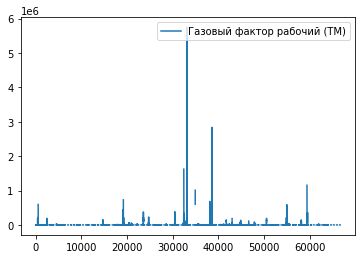

In [18]:
well_df.plot(y=['Газовый фактор рабочий (ТМ)'])